Total number of groups: 112

Group: 사과 (Count: 86)
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과
 - 사과


Group: 경산사과 (Count: 61)
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산 사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산 사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산사과
 - 경산 

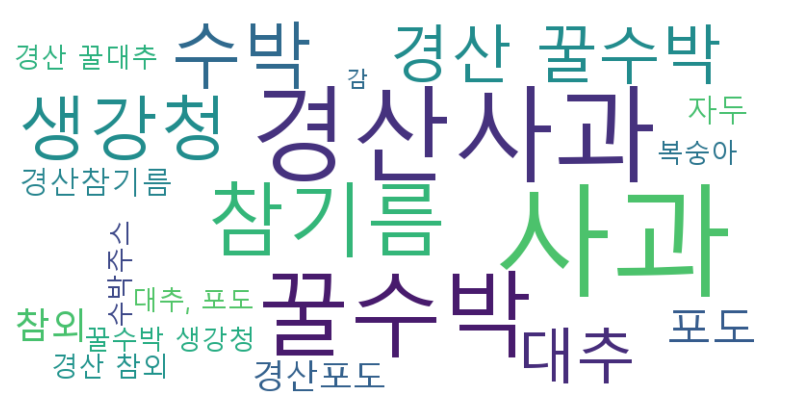

워드클라우드가 생성되었습니다. 필요한 경우, 터미널의 출력 부분을 스크롤하여 확인하세요.
Final grouped facilities and word clouds saved to data\Q24


In [3]:
import pandas as pd
import os
import difflib
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import time

# 텍스트 파일 경로 설정
text_file_path = 'data/Q24.txt'

# 폰트 경로 설정 (윈도우용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())

# 1. 데이터 로드
with open(text_file_path, 'r', encoding='utf-8') as file:
    text = file.readlines()

# 2. 전처리

# 불필요한 단어들 제거
text = [facility.strip().lower() for facility in text if facility.strip() and facility.strip().lower() not in ['없음', '모름', '없다', '기억안남', '모르겠다', '없어요', '생각안남','없습니다', '특별히', '이름이']]

# 2-1. 서술어 제거 (정규식을 사용한 구문 단위 서술어 제거)
def remove_predicates(sentence):
    sentence = re.sub(r'\b\w+(하다|되다|하였다|되었다|하였|되고|하는|되게|하게|하려고|해요|했어요|했다|나요|어요|없음|니다)\b', '', sentence)
    return sentence.strip()

text_cleaned = [remove_predicates(facility) for facility in text if remove_predicates(facility)]

# 3. 유사한 이름끼리 그룹화
grouped_facilities = {}
threshold = 0.8  # 유사도 기준

for facility in text_cleaned:
    found = False
    for key in grouped_facilities.keys():
        if difflib.SequenceMatcher(None, key, facility).ratio() > threshold:
            grouped_facilities[key].append(facility)
            found = True
            break
    if not found:
        grouped_facilities[facility] = [facility]

# 4. 그룹별 단어 수를 기준으로 정렬 및 출력
sorted_groups = sorted(grouped_facilities.items(), key=lambda x: len(x[1]), reverse=True)

# 총 그룹 수 출력
total_groups = len(sorted_groups)
print(f"Total number of groups: {total_groups}\n")

result = []
for key, group in sorted_groups:
    group_size = len(group)
    print(f"Group: {key} (Count: {group_size})")
    for facility in group:
        print(f" - {facility}")
        result.append([key, facility, group_size])
    print("\n")

# 저장 폴더 경로 설정
save_folder = os.path.join('data', os.path.splitext(os.path.basename(text_file_path))[0])
os.makedirs(save_folder, exist_ok=True)

# 5. 엑셀 파일로 출력물 저장
excel_file_path_initial = os.path.join(save_folder, 'grouped_facilities_initial.xlsx')
df_initial = pd.DataFrame(result, columns=["Group", "Facility", "Count"])
df_initial.to_excel(excel_file_path_initial, index=False)

print(f"Initial grouped facilities saved to {excel_file_path_initial}\n")

# 6. 워드클라우드 생성 및 상호작용

def create_and_show_wordcloud(word_freq):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 상위 20개 그룹
top_20_groups = sorted_groups[:20]
word_freq = {key: len(group) for key, group in top_20_groups}

# 처음 워드클라우드 생성 및 표시
create_and_show_wordcloud(word_freq)
print("워드클라우드가 생성되었습니다. 필요한 경우, 터미널의 출력 부분을 스크롤하여 확인하세요.")

# 7. 사용자가 삭제할 그룹 입력
while True:
    to_delete = input("삭제할 그룹명을 입력하세요 (삭제할 그룹이 없으면 '끝'이라고 입력): ")
    if to_delete == '끝':
        break
    if to_delete in word_freq:
        del word_freq[to_delete]
        print(f"그룹 '{to_delete}'이(가) 삭제되었습니다.")
        create_and_show_wordcloud(word_freq)  # 업데이트된 워드클라우드 표시
        print("워드클라우드가 갱신되었습니다. 스크롤을 내려 확인하세요.")
        time.sleep(2)  # 잠시 대기하여 출력된 내용을 확인할 시간을 제공
    else:
        print(f"그룹 '{to_delete}'이(가) 워드클라우드에 존재하지 않습니다.")

# 8. 최종 워드클라우드 저장 및 변형된 그룹 결과물 저장
final_wordcloud_12x8 = WordCloud(font_path=font_path, width=int(12*37.795275591), height=int(8*37.795275591), background_color='white').generate_from_frequencies(word_freq)
final_wordcloud_8x8 = WordCloud(font_path=font_path, width=int(8*37.795275591), height=int(8*37.795275591), background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12/2.54, 8/2.54))
plt.imshow(final_wordcloud_12x8, interpolation='bilinear')
plt.axis('off')
#plt.savefig(os.path.join(save_folder, 'wordcloud_12x8cm.png'), format='png')
plt.savefig(os.path.join(save_folder, 'wordcloud_12x8cm.png'), format='png',
           dpi=254,
    bbox_inches='tight',  # 여백을 최소화
    pad_inches=0)          # 추가 패딩을 없앰 )
plt.close()

plt.figure(figsize=(8/2.54, 8/2.54))
plt.imshow(final_wordcloud_8x8, interpolation='bilinear')
plt.axis('off')
#plt.savefig(os.path.join(save_folder, 'wordcloud_8x8cm.png'), format='png')
plt.savefig(os.path.join(save_folder, 'wordcloud_8x8cm.png'), format='png',
           dpi=254,
    bbox_inches='tight',  # 여백을 최소화
    pad_inches=0)          # 추가 패딩을 없앰 )
plt.close()

# 변형된 그룹 결과물 저장
final_grouped_result = []
for key in word_freq.keys():
    group = grouped_facilities[key]
    group_size = len(group)
    for facility in group:
        final_grouped_result.append([key, facility, group_size])

excel_file_path_final = os.path.join(save_folder, 'grouped_facilities_final.xlsx')
df_final = pd.DataFrame(final_grouped_result, columns=["Group", "Facility", "Count"])
df_final.to_excel(excel_file_path_final, index=False)

print(f"Final grouped facilities and word clouds saved to {save_folder}")

